In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase 10: Control y aislamiento de las vibraciones </h1>
<h3 style="text-align:center">ACUS262: Aislamiento y Análisis de Vibraciones</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS262-Aislamiento-y-analisis-de-vibraciones">https://github.com/vpobleteacustica/ACUS262-Aislamiento-y-analisis-de-vibraciones</a><br> 
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br>

# Control de las vibraciones:

> + La rigidez $k$, el amortiguamiento $c$ y la masa $m$, cumplen roles importantes en el comportamiento de las funciones de transferencia en distintos rangos de frecuencia. Esto tiene importancia a su vez, en el control de las vibraciones.

> + Por ejemplo, la magnitud de la función de transferencia que representa el desplazamiento sobre la fuerza, llamada receptancia está dada por:

\begin{align*}
\left|\frac{X(j\omega)}{F(j\omega)}\right|&=\large \frac{1}{m}\frac{1}{\sqrt{(\omega_{0}^{2}-\omega^{2})^{2}+(2\zeta \omega\omega_{0})^{2} }}
\end{align*}

> + Análisis por regiones de frecuencia (ver por ejemplo, capítulo 2.10: https://engfac.cooper.edu/pages/tzavelis/uploads/Vibration%20Theory.pdf):

>> + Cuando $\omega << \omega_{0}:$ $\quad$ $\large\left|\frac{X(j\omega)}{F(j\omega)}\right| \longrightarrow \large\frac{1}{k}$ $\quad$ se dice que el sistema vibratorio está controlado por el resorte.

>> + Cuando $\omega = \omega_{0}:$ $\quad$ $\large\left|\frac{X(j\omega)}{F(j\omega)}\right| \longrightarrow \large \frac{1}{c\cdot \omega_{0}}$ $\quad$ se dice que el sistema vibratorio está controlado por el amortiguador.

>> + Cuando $\omega >> \omega_{0}:$ $\quad$ $\large\left|\frac{X(j\omega)}{F(j\omega)}\right| \longrightarrow \large\frac{1}{m\cdot \omega^{2}}$ $\quad$ se dice que el sistema vibratorio está controlado por la masa.

<p style="text-align:center">
	<img src="CONTROLLED.png" alt="MDOF" width=25%/></a><br>
    <strong> Figura 1: Tres condiciones de frecuencia para control de vibraciones.</strong>
</p>

> + Ver interesante animación en: https://www.acs.psu.edu/drussell/Demos/Resonance-Regions/Resonance.html

# Analizar en frecuencia el movimiento que se transmite desde una base móvil hasta una masa

> + La excitación está en la base como se muestra en la Figura 2:

<p style="text-align:center">
	<img src="MovimientoBase.png" alt="MDOF" width=25%/></a><br>
    <strong> Figura 2: Base en vibración $y(t)$. Meirovitch, pag. 128.</strong>
</p>

> + La masa es lo que nos interesa proteger de las vibraciones.

> + La magnitud de la fuerza de excitación será $y(t)$ y en este problema, esta magnitud está dada en términos de un desplazamiento.

> + La salida o respuesta del movimiento vibratorio de la masa está dada por $x(t)$.

> + Queremos cuantificar (conocer) la magnitud de la fuerza transmitida a la masa $m$.

> + Del diagrama de cuerpo libre, obtenemos:

\begin{align*}
m\ddot{x}(t)+c\,(\dot{x}(t)-\dot{y}(t)) + k\,(x(t)-y(t))& =0
\end{align*}

\begin{align*}
\ddot{x}(t)+2\zeta \omega_{0}\,(\dot{x}(t)-\dot{y}(t))+\omega_{0}^{2}\,(x(t)-y(t))& =0
\end{align*}

\begin{align*}
\ddot{x}(t)+2\zeta \omega_{0}\,\dot{x}(t) +\omega_{0}^{2}x(t)&= 2\zeta\omega_{0}\dot{y}(t)+\omega_{0}^{2}y(t)\quad \,\,\,{\large/}\mathscr{F}\left\{\cdot\right\}
\end{align*}

> + $\ldots$

# Plots: Espectro de magnitud, espectro de fase, parte real vs. frecuencia, parte imaginaria vs. frecuencia, parte real vs. parte imaginaria

In [4]:
import numpy as np
# Queremos mostrar todos los gráficos en uno sólo y no en ventanas separadas.
%matplotlib inline
# Importamos el módulo "matplotlib.pyplot" y lo abreviamos con el apodo plt.
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter # https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/engineering_formatter.html

findfont: Font family ['nunito'] not found. Falling back to DejaVu Sans.
findfont: Font family ['nunito'] not found. Falling back to DejaVu Sans.


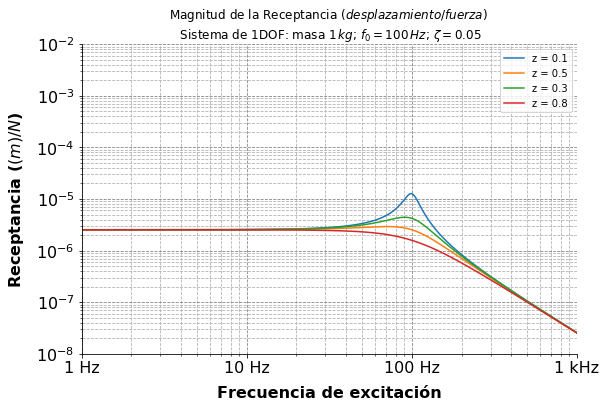

In [1]:
m   = 1               # masa 1 kg
f0  = 100             # frecuencia natural f0= 100 Hz  ( w0 = 628.32 rad/s )
w0  = f0 * 2 * np.pi  # a rad/s
k   = m*w0**2 # rigidez k = 3.948e+05 N/m
z   = [0.1,0.5,0.3,0.8] # factor de amortiguamiento ξ = 0.05
w   = np.logspace(0,4,5000)

NAD   = (w0**2/k)
fig = plt.figure(figsize=(8, 5))
for i in range(len(z)):
    DAD   = (w0**2 -w**2) +1.j*2*z[i]*w0*w
    FRFAD = NAD/DAD
    ax = plt.gca()

    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)

    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(True, linestyle='--', color='0.5')
    ax.set_axisbelow(True) 
    ax.plot(w/(2*np.pi),np.abs(FRFAD),label='z = ' + str(z[i]))
    plt.yscale('log')
    plt.xscale('log')
    ax.set_xlabel('Frecuencia de excitación',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_ylabel('Receptancia ($(m)/N$)', color='k',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_title('Magnitud de la Receptancia ($desplazamiento/fuerza$) \n Sistema de 1DOF: masa $1\,kg$; $f_{0}=100\,Hz$; $\zeta=0.05$')
    formatter0 = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter0)
    #plt.ylim(0.0000001, 0.000100)
    plt.xlim(1, 1000)
    plt.ylim(10**-8,10**-2)
    plt.grid(True,which="both",ls="--")
for tl in ax.get_yticklabels():
    tl.set_color('k')
plt.legend()
plt.show()

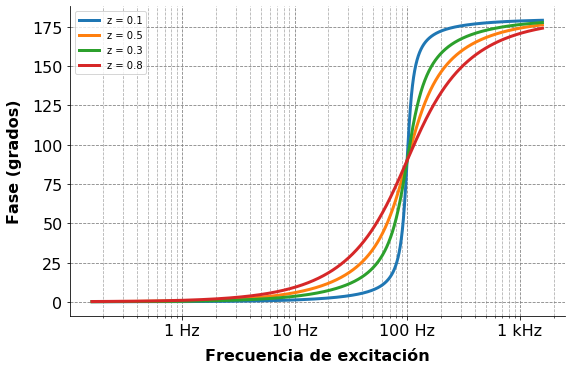

In [5]:
fig = plt.figure(figsize=(8, 5))
for i in range(len(z)):
    N  = 2*z[i]*w*w0 # parte imag
    D  = (w0**2) - (w**2) # parte real
    #phi_FRFA = (np.pi- np.angle(FRFA))*180/np.pi  # *180/np.pi pasa la salida a grados, por defecto está en radianes
    phi_FRFA = np.arctan2(N,D)*180/np.pi # 𝑝ℎ𝑎𝑠𝑒:=𝑎𝑡𝑎𝑛2(N.𝑖𝑚𝑎𝑔,D.𝑟𝑒𝑎𝑙)
    # Definimos aspectos generales de la figura, después graficamos resultado

    ax = plt.gca()

    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(True, linestyle='--', color='0.5')
    ax.set_axisbelow(True)
    ax.semilogx(w/(2*np.pi),phi_FRFA,linewidth = 3.0,label='z = '+str(z[i]))
    plt.grid(True,which="both",ls="--")
    formatter0 = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter0)
    ax.set_xlabel('Frecuencia de excitación',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_ylabel('Fase (grados)', color='k',family='nunito', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

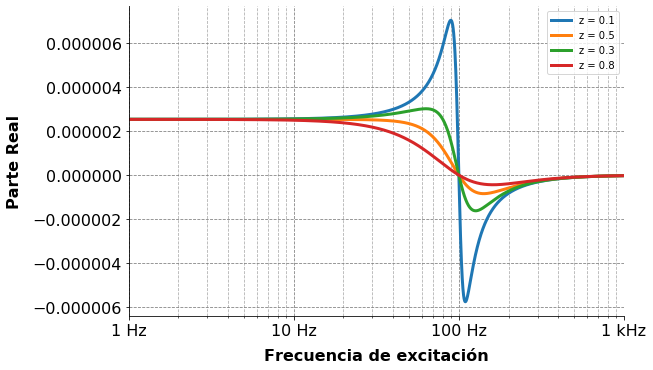

In [6]:
fig = plt.figure(figsize=(8, 5))
for i in range(len(z)):
    D  = (w0**2/k)*(w0**2-w**2)/((w0**2-w**2)**2+(2*z[i]*w0*w)**2) # parte real
    # Definimos aspectos generales de la figura, después graficamos resultado
    ax = plt.gca()

    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(True, linestyle='--', color='0.5')
    ax.set_axisbelow(True)
    ax.semilogx(w/(2*np.pi),D,linewidth = 3.0,label='z = '+str(z[i]))
    plt.grid(True,which="both",ls="--")
    formatter0 = EngFormatter(unit='Hz')
    ax.xaxis.set_major_formatter(formatter0)
    ax.set_xlim([1,1000])
    ax.set_xlabel('Frecuencia de excitación',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_ylabel('Parte Real', color='k',family='nunito', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

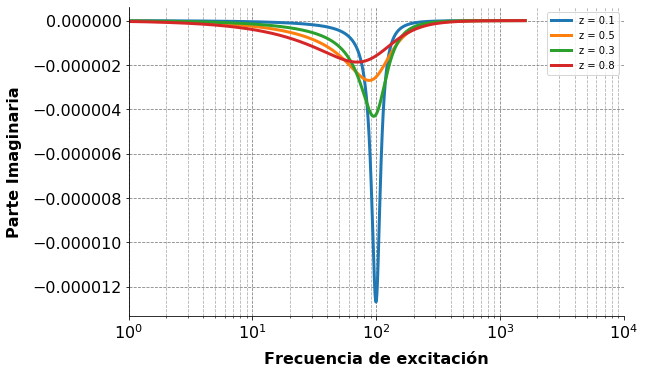

In [7]:
fig = plt.figure(figsize=(8, 5))
for i in range(len(z)):
    N  = -(w0**2/k)*(2*z[i]*w0*w)/((w0**2-w**2)**2+(2*z[i]*w0*w)**2) # parte imag

    # Definimos aspectos generales de la figura, después graficamos resultado

    ax = plt.gca()

    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(True, linestyle='--', color='0.5')
    ax.set_axisbelow(True)
    ax.semilogx(w/(2*np.pi),N,linewidth = 3.0,label='z = '+str(z[i]))
    plt.grid(True,which="both",ls="--")
    ax.set_xlim([1,10000])
    ax.set_xlabel('Frecuencia de excitación',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_ylabel('Parte Imaginaria', color='k',family='nunito', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

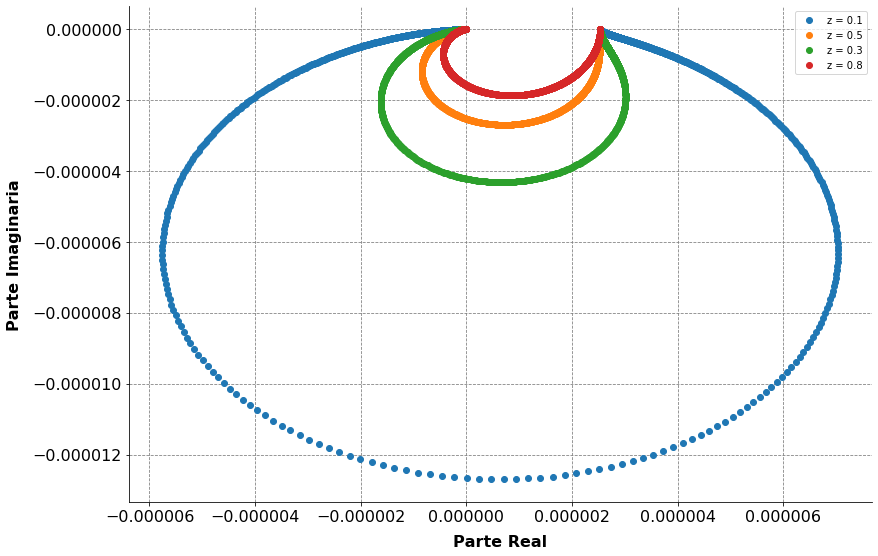

In [9]:
fig = plt.figure(figsize=(12, 8))
for i in range(len(z)):
    N  = -(w0**2/k)*(2*z[i]*w0*w)/((w0**2-w**2)**2+(2*z[i]*w0*w)**2) # parte imag
    D  = (w0**2/k)*(w0**2-w**2)/((w0**2-w**2)**2+(2*z[i]*w0*w)**2) # parte real
    # Definimos aspectos generales de la figura, después graficamos resultado

    ax = plt.gca()

    plt.subplots_adjust(bottom = 0.1    , left = 0.1     , top = 0.96, right = 0.96)
    plt.setp(ax.get_ymajorticklabels(), family = 'nunito', fontsize = 16)
    plt.setp(ax.get_xmajorticklabels(), family = 'nunito', fontsize = 16)
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.grid(True, linestyle='--', color='0.5')
    ax.set_axisbelow(True)
    ax.plot(D,N,'o',linewidth = 3.0,label='z = '+str(z[i]))
    plt.grid(True,which="both",ls="--")
    #ax.set_ylim([-(0.2*10**7),(0.2*10**7)])
    
    ax.set_xlabel('Parte Real',family='nunito', fontsize=16, weight='bold', labelpad=10)
    ax.set_ylabel('Parte Imaginaria', color='k',family='nunito', fontsize=16, weight='bold', labelpad=10)
plt.legend()
plt.show()

# Función de Transmisibilidad y aislamiento de vibraciones

>+ Podemos obtener la razón entre la magnitud de la respuesta de salida (o magnitud de la fuerza transmitida) y la magnitud de la fuerza de excitación, la que es definida como la función de Transmisibilidad (TR) de desplazamiento:

\begin{align*}
TR&= \left|\frac{X(j\omega)}{Y(j\omega)}\right|= {\large \frac{F_{t}}{F_{e}}} = \sqrt{ \frac{1+(2\zeta r)^{2}}{(1-r^{2})^{2}+(2\zeta r)^{2} }}
\end{align*}

> + Esta nueva función nos ayuda a analizar cómo el movimiento vibratorio se transmite desde la base móvil a la masa $m$, en varias regiones de frecuencia (ver por ejemplo, página 5: http://www.vibrationdata.com/tutorials2/VibrationIsolationBasics.pdf, y https://www.mne.psu.edu/lamancusa/me458/12_vibration.pdf, páginas 12.5 y 12.6).

> + El valor de $TR$ es 1 cuando $r\longrightarrow 0$ es decir, para frecuencias bajas la fuerza total de la base es transmitida a la masa $m$.

> + En la región de resonancia, $r=1$, para un sistema sin amortiguamiento ($\zeta=0$), $TR\longrightarrow \infty$, se amplifica dramáticamente la fuerza transmitida a la masa $m$.

> + Cuando $r=\sqrt{2}$ nuevamente la fuerza total de la base es transmitida a la masa $m$.

> + El valor de $TR<1$ si se cumple que $r>\sqrt{2}$, es decir, la fuerza total transmitida a la masa comienza a disminuir en frecuencias altas para $\forall$ $\zeta$, (funciona el aislamiento de las vibraciones).

> + Aunque, se debe observar que para $r>\sqrt{2}$, la fuerza transmitida a la masa crece si también aumenta $\zeta$ por lo que se debe poner atención a este efecto.

# Tarea: Graficar la función de transmisibilidad TR

+ Usar distintos valores de $\zeta$
+ Indicar en el gráfico cuál es la zona de aislación.

# Evaluar la transmisibilidad y analizar cuán eficiente es un aislador para aislar vibraciones no deseadas.

> + Suponer que la frecuencia natural de un aislador es igual a 10 Hz.

> + Usar un factor de amortiguamiento viscoso igual a 7%.

> + Con estos dos valores, graficar la curva de TR versus frecuencia en Hz.

<p style="text-align:center">
	<img src="TR.png" alt="MDOF" width=20%/></a><br>
    <strong> Figura 1: TR vs frecuencia en Hz.</strong>
</p>

> + Calcular el valor de amplificación del aislador en resonancia debido al amortiguamiento de 7%.

> + Obtener el valor de frecuencia en Hz a partir del cual el aislador comenzará a aislar la vibración no deseada.

> + Evaluar la transmisibilidad en 30 Hz $\left({\text{TR}}_{30\,{\text{Hz}}}\right)$. Expresar este valor en %. Obtener la reducción de vibración (aislación) en 30 Hz como: $1- \left({\text{TR}}_{30\,{\text{Hz}}}\right)$. Expresar este valor en %. 

> + Qué pasa si agregamos amortiguamiento al asilador? Cambiemos el factor de amortiguamiento viscoso a 20%. Analizar los efectos de aislación y transmisibilidad. Graficar la curva de TR versus frecuencia sobre la misma figura anterior usando otro color.

> + Con un factor de amortiguamiento viscoso a 20%, calcular el valor de amplificación del aislador en resonancia.

> + Al agregar amortiguamiento al aislador, evaluar la transmisibilidad en 30 Hz y expresarla además, en %. Obtener la reducción de vibración en 30 Hz. Expresar este valor en %.